# 120 Years of Olympic History: Data Wrangling and Visualisation in Pandas

**Module:** MN5813 – Business Analytics  
**Assessment:** Group Report (20%) – Olympics Data Wrangling & Visualisation  
**Candidate Number:** 2610587  

**GitHub repository (notebook + files):**  
https://github.com/Grewal226/olympics_project_report_cleean  

---


## Access to Notebook and Data (QR code & URL)

Markers can access the original Jupyter Notebook and associated files (including the data file and any exported figures) via the following URL:

> https://github.com/Grewal226/olympics_project_report_cleean

The QR code below also links directly to the same repository.


<p align="center">
Scan the QR code below to access the GitHub repository:<br>
<img src="https://api.qrserver.com/v1/create-qr-code/?size=200x200&data=https://github.com/Grewal226/olympics_project_report_cleean">
</p>


## AI Use Statement

A generative AI tool was used only to support planning, structure and general wording of markdown notes. All coding, analysis, and written content were completed by the author, who takes full responsibility for the work presented.


## 1. Aim and objectives

**Aim**  
To show how Pandas can be applied to clean, transform and visually explore a large real-world dataset, using historic Olympic athlete–event records as an example.

**Objectives**  

• Load and structure the dataset using Pandas. 
• Clean the data by dealing with missing values and removing duplicates. 
• Carry out exploratory summaries and produce visual outputs that communicate patterns clearly.


## 2. Context and tools

Olympic datasets are widely used because they combine long-term trends in sport, demographics and international participation. The focus of this notebook is on practical data handling — reshaping the data, producing summary statistics and presenting them visually. Pandas is used for processing, while Matplotlib and Seaborn provide the visual outputs within a reproducible Jupyter Notebook environment.


## 3. Data collection

The analysis is based on the ‘120 Years of Olympic History’ dataset, which records athlete-event results from 1896 to 2016. It includes demographic information alongside event and medal outcomes, making it suitable for exploring different types of patterns.

For the purposes of this notebook, a local copy of the dataset is stored in the file `athlete_events.csv` in the same directory as the
notebook. 


In [2]:
# 4. Data loading

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set some basic plotting defaults
plt.rcParams["figure.figsize"] = (8, 5)
sns.set_theme()

# Load the Olympic athlete–event data
olympics = pd.read_csv("athlete_events.csv")

print("Shape (rows, columns):", olympics.shape)
print("Column names:", olympics.columns.tolist())

olympics.head()


Shape (rows, columns): (271116, 15)
Column names: ['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal']


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


The file `athlete_events.csv` is loaded into a DataFrame called `olympics`. Each row represents a single athlete–event appearance, so the
same athlete can appear in multiple rows if they competed in several events or in more than one Games. The dataset contains 271,116 rows
and 15 columns covering identifiers, demographics, country codes (NOCs), events and medal outcomes.


In [3]:
# 5. Data processing: cleaning

# 5.1 Overview of missing values
missing_counts = olympics.isna().sum().sort_values(ascending=False)
missing_counts


Medal     231333
Weight     62875
Height     60171
Age         9474
ID             0
Name           0
Sex            0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
dtype: int64

In [4]:
# 5.2 Remove exact duplicate rows (if any)
before_rows = len(olympics)
olympics = olympics.drop_duplicates()
after_rows = len(olympics)
removed_duplicates = before_rows - after_rows

print(f"Rows before removing duplicates: {before_rows}")
print(f"Rows after removing duplicates:  {after_rows}")
print(f"Exact duplicate rows removed:    {removed_duplicates}")


Rows before removing duplicates: 271116
Rows after removing duplicates:  269731
Exact duplicate rows removed:    1385


In [5]:
# 5.3 Convert Year to a datetime representation for convenience
olympics["Year_dt"] = pd.to_datetime(olympics["Year"], format="%Y")

olympics.info()


<class 'pandas.core.frame.DataFrame'>
Index: 269731 entries, 0 to 271115
Data columns (total 16 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   ID       269731 non-null  int64         
 1   Name     269731 non-null  object        
 2   Sex      269731 non-null  object        
 3   Age      260416 non-null  float64       
 4   Height   210917 non-null  float64       
 5   Weight   208204 non-null  float64       
 6   Team     269731 non-null  object        
 7   NOC      269731 non-null  object        
 8   Games    269731 non-null  object        
 9   Year     269731 non-null  int64         
 10  Season   269731 non-null  object        
 11  City     269731 non-null  object        
 12  Sport    269731 non-null  object        
 13  Event    269731 non-null  object        
 14  Medal    39772 non-null   object        
 15  Year_dt  269731 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(10)
memory

### 5. Data processing: cleaning

The cleaning stage concentrates on simple but important steps that make later work more reliable:

- The `isna()` summary shows that missing values are concentrated in the `Medal`, `Height`, `Weight` and `Age` columns. Missing medals are
  expected because most athletes do not win a medal. Missing age and anthropometric data are more problematic and are handled in a way that
  depends on the analysis being performed.
- Exact duplicate rows across all columns are removed using `drop_duplicates()`. This avoids counting the same athlete–event twice. In the
  original file there are 1,385 such rows, which are dropped.
- A new column `Year_dt` is created by converting the integer `Year` to a datetime object. This does not change the underlying values but
  makes it easier to work with time-based groupings if needed.

At this stage the dataset is structurally tidy and ready for further processing.


In [6]:
# 5.4 Simple imputation for height and weight (stretch element)

# Work on copies so that the original columns are preserved
olympics["Height_imputed"] = olympics["Height"]
olympics["Weight_imputed"] = olympics["Weight"]

# Compute median height and weight within Sport-Sex groups
group_height_median = olympics.groupby(["Sport", "Sex"])["Height"].transform("median")
group_weight_median = olympics.groupby(["Sport", "Sex"])["Weight"].transform("median")

# Fill missing values using these medians
olympics["Height_imputed"] = olympics["Height_imputed"].fillna(group_height_median)
olympics["Weight_imputed"] = olympics["Weight_imputed"].fillna(group_weight_median)

olympics[["Sport", "Sex", "Height", "Height_imputed", "Weight", "Weight_imputed"]].head()


,Sport,Sex,Height,Height_imputed,Weight,Weight_imputed
0,Basketball,M,180.0,180.0,80.0,80.0
1,Judo,M,170.0,170.0,60.0,60.0
2,Football,M,NaN,178.0,NaN,73.0
3,Tug-Of-War,M,NaN,182.0,NaN,95.0
4,Speed Skating,F,185.0,185.0,82.0,82.0


For some later summaries it is convenient to have complete height and weight information. Rather than dropping all rows with missing
values, a simple form of imputation is used as a stretch element: for each sport–sex combination the median height and weight are
calculated and used to fill in any gaps. The original `Height` and `Weight` columns are retained so that it remains clear which values are
observed and which are imputed.


In [7]:
# 6. Data processing: wrangling

# 6.1 Age groups
age_bins = [0, 18, 25, 35, 200]
age_labels = ["0–18", "19–25", "26–35", "36+"]
olympics["Age_Group"] = pd.cut(olympics["Age"], bins=age_bins, labels=age_labels, include_lowest=True)
olympics["Age_Group"] = olympics["Age_Group"].cat.add_categories(["Unknown"])
olympics.loc[olympics["Age"].isna(), "Age_Group"] = "Unknown"

# 6.2 Tidy name fields
olympics["Full_Name"] = olympics["Name"].str.strip()
olympics["Given_Name"] = olympics["Full_Name"].str.split().str[0]
olympics["Family_Name"] = olympics["Full_Name"].str.split().str[-1]

# 6.3 Century and decade
olympics["Century_Number"] = (olympics["Year"] - 1) // 100 + 1

def to_ordinal(n: int) -> str:
    # Simple ordinal helper; suitable for small integers such as centuries
    return "%d%s" % (n, "tsnrhtdd"[(n // 10 % 10 != 1) * (n % 10 < 4) * n % 10 :: 4])

olympics["Century_Label"] = olympics["Century_Number"].apply(to_ordinal)
olympics["Decade"] = (olympics["Year"] // 10) * 10

# 6.4 Medal indicators
olympics["Is_Medalist"] = olympics["Medal"].notna().astype(int)
medal_points = {"Gold": 3, "Silver": 2, "Bronze": 1}
olympics["Medal_Score"] = olympics["Medal"].map(medal_points).fillna(0).astype(int)

olympics[["Age", "Age_Group", "Full_Name", "Century_Label", "Decade", "Is_Medalist", "Medal_Score"]].head()


,Age,Age_Group,Full_Name,Century_Label,Decade,Is_Medalist,Medal_Score
0,24.0,19–25,A Dijiang,20th,1990,0,0
1,23.0,19–25,A Lamusi,21st,2010,0,0
2,24.0,19–25,Gunnar Nielsen Aaby,20th,1920,0,0
3,34.0,26–35,Edgar Lindenau Aabye,19th,1900,1,3
4,21.0,19–25,Christine Jacoba Aaftink,20th,1980,0,0


### 6. Data processing: wrangling

Several additional variables are created to make the data easier to analyse:

- **Age_Group**: athletes are placed into broad age bands (0–18, 19–25, 26–35, 36+). Observations without an age are labelled as
  `Unknown`. This allows age patterns to be compared across sports and over time without relying on exact ages.
- **Full_Name**, **Given_Name** and **Family_Name**: the original `Name` field is cleaned so that names can be used consistently when
  aggregating medals by athlete.
- **Century_Label** and **Decade**: these variables summarise the timing of each Games in a more interpretable way than the raw year and
  make it straightforward to look at long-run trends.
- **Is_Medalist** and **Medal_Score**: these indicators distinguish medallists from non-medallists and assign a simple score to medal
  types (Gold = 3, Silver = 2, Bronze = 1, no medal = 0). This is useful when summarising overall success across different dimensions.




In [8]:
# 7. Visual data exploration and analysis

# 7.1 Average age of athletes for each Olympic event
age_by_event = (
    olympics
    .dropna(subset=["Age"])
    .groupby("Event", as_index=False)["Age"]
    .mean()
    .rename(columns={"Age": "Average_Age"})
)

# Identify youngest and oldest events
youngest_events = age_by_event.sort_values("Average_Age").head(10)
oldest_events = age_by_event.sort_values("Average_Age").tail(10)

print("Youngest events by average age:")
display(youngest_events)

print("Oldest events by average age:")
display(oldest_events)


Youngest events by average age:


,Event,Average_Age
220,Croquet Mixed Doubles,18.500000
428,Rhythmic Gymnastics Women's Group,18.519481
663,Swimming Women's 300 metres Freestyle,18.571429
618,"Swimming Men's 1,200 metres Freestyle",18.666667
670,Swimming Women's 800 metres Freestyle,18.723343
667,Swimming Women's 400 metres Freestyle,18.866667
654,Swimming Women's 100 metres Backstroke,18.921713
658,Swimming Women's 200 metres Backstroke,18.952607
429,Rhythmic Gymnastics Women's Individual,19.043956
382,Gymnastics Women's Individual All-Around,19.047681


Oldest events by average age:


,Event,Average_Age
23,"Archery Men's Target Archery, 28 metres, Indiv...",47.000000
59,"Art Competitions Mixed Sculpturing, Medals",48.647059
32,Archery Women's Double Columbia Round,48.800000
25,"Archery Men's Target Archery, 33 metres, Indiv...",49.000000
27,"Archery Men's Target Archery, 50 metres, Indiv...",49.000000
30,Archery Men's Team Round,49.066667
18,Archery Men's Double American Round,49.444444
60,"Art Competitions Mixed Sculpturing, Medals And...",51.428571
430,Roque Men's Singles,53.333333
36,Archery Women's Team Round,55.000000


In [9]:
# 7.2 Top 10 countries with the most gold medals

gold_only = olympics[olympics["Medal"] == "Gold"]

gold_by_noc = (
    gold_only
    .groupby("NOC", as_index=False)
    .size()
    .rename(columns={"size": "Gold_Count"})
    .sort_values("Gold_Count", ascending=False)
)

top10_gold_noc = gold_by_noc.head(10)
top10_gold_noc


,NOC,Gold_Count
103,USA,2638
101,URS,1082
39,GER,745
36,GBR,677
51,ITA,575
34,FRA,499
89,SWE,479
14,CAN,463
44,HUN,432
37,GDR,397


In [10]:
# 7.3 Athlete with the most medals in each sport

medal_rows = olympics[olympics["Medal"].notna()]

medals_per_athlete_sport = (
    medal_rows
    .groupby(["Sport", "Full_Name"], as_index=False)
    .size()
    .rename(columns={"size": "Medal_Count"})
)

idx_max = medals_per_athlete_sport.groupby("Sport")["Medal_Count"].idxmax()
top_athletes_by_sport = medals_per_athlete_sport.loc[idx_max].sort_values("Medal_Count", ascending=False)

top_athletes_by_sport.head(15)


,Sport,Full_Name,Medal_Count
23908,Swimming,"Michael Fred Phelps, II",28
12760,Gymnastics,Larysa Semenivna Latynina (Diriy-),18
4934,Biathlon,Ole Einar Bjrndalen,13
9406,Fencing,Edoardo Mangiarotti,13
6241,Canoeing,Birgit Fischer-Schmidt,12
2748,Athletics,Paavo Johannes Nurmi,12
21365,Shooting,Carl Townsend Osburn,11
7091,Cross Country Skiing,Marit Bjrgen,10
8860,Equestrianism,Isabelle Regina Werth,10
22192,Short Track Speed Skating,Yang Yang,10


## 7. Visual data exploration and analysis

The visual summaries highlight three main themes: differences in age profiles across sports, the concentration of medal success among a small number of nations, and the rise in female participation over time. These patterns reflect sporting demands, resources and wider social change.


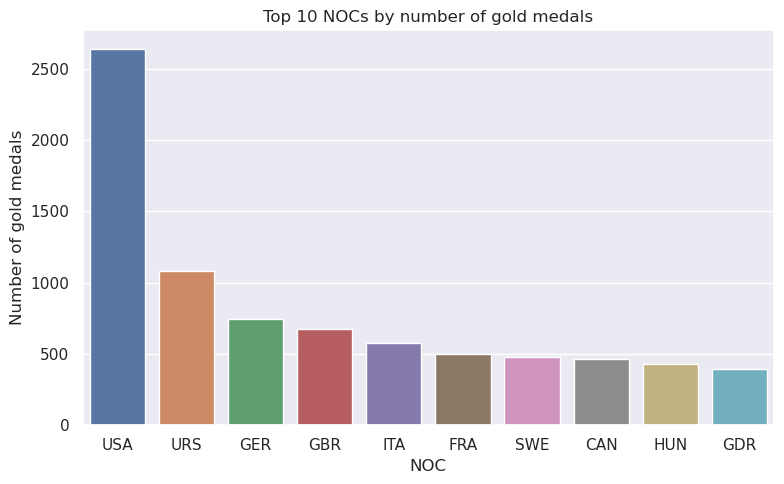

In [11]:
# 8. Visual data exploration: plots

# 8.1 Top 10 NOCs by gold medals (bar chart)
plt.figure()
sns.barplot(data=top10_gold_noc, x="NOC", y="Gold_Count")
plt.title("Top 10 NOCs by number of gold medals")
plt.xlabel("NOC")
plt.ylabel("Number of gold medals")
plt.tight_layout()
plt.savefig("figure_top10_gold_noc.png", dpi=300)
plt.show()


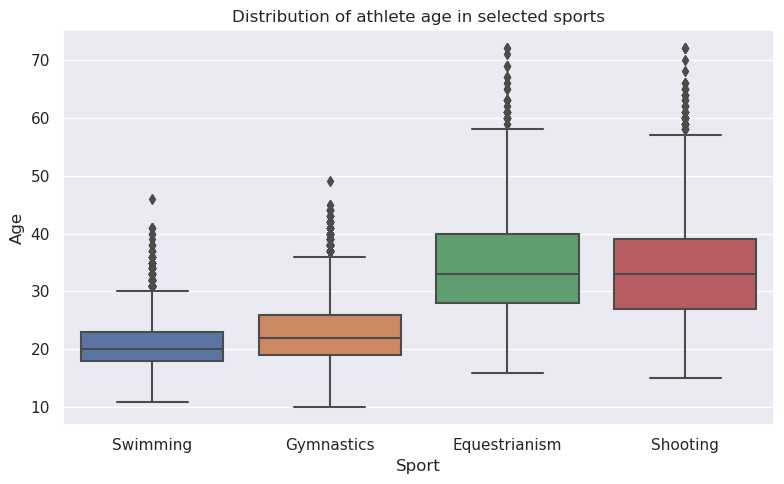

In [12]:
# 8.2 Age distribution in selected sports (boxplot)

selected_sports = ["Gymnastics", "Swimming", "Equestrianism", "Shooting"]
age_sport_sample = olympics.dropna(subset=["Age"])
age_sport_sample = age_sport_sample[age_sport_sample["Sport"].isin(selected_sports)]

plt.figure()
sns.boxplot(data=age_sport_sample, x="Sport", y="Age")
plt.title("Distribution of athlete age in selected sports")
plt.xlabel("Sport")
plt.ylabel("Age")
plt.tight_layout()
plt.savefig("figure_age_distribution_selected_sports.png", dpi=300)
plt.show()


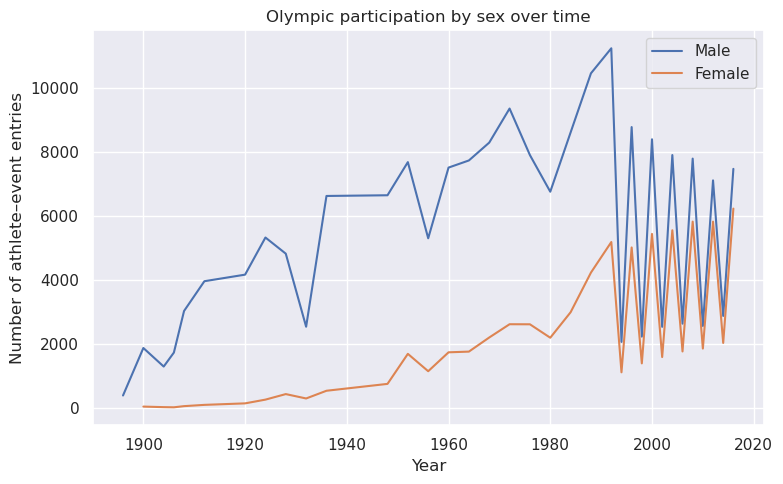

In [13]:
# 8.3 Gender participation over time (line chart)

entries_by_sex = olympics.pivot_table(
    index="Year",
    columns="Sex",
    values="ID",
    aggfunc="count"
)

plt.figure()
for sex_code, label in [("M", "Male"), ("F", "Female")]:
    if sex_code in entries_by_sex.columns:
        plt.plot(entries_by_sex.index, entries_by_sex[sex_code], label=label)

plt.legend()
plt.title("Olympic participation by sex over time")
plt.xlabel("Year")
plt.ylabel("Number of athlete–event entries")
plt.tight_layout()
plt.savefig("figure_gender_participation_over_time.png", dpi=300)
plt.show()


### Interpretation of visual exploration

The three figures are intended to be simple but informative:

- **Top 10 NOCs by gold medals**: the bar chart underlines how skewed the distribution of gold medals is. The United States stands well
  clear of other countries, and there is a steep drop-off after the first few NOCs. This is consistent with the idea that long-run Olympic
  success is concentrated among a relatively small group of nations with the resources and sporting infrastructure to support repeated
  high-level performance.
- **Age distributions in selected sports**: the boxplots for gymnastics and swimming show younger age distributions, with low medians and
  relatively narrow interquartile ranges. Equestrianism and shooting, by contrast, have higher median ages and much wider spreads,
  implying that athletes can remain competitive for longer. The visual makes clear at a glance how the physical and technical demands of
  different sports translate into very different career patterns.
- **Gender participation over time**: the line chart confirms that early Games were overwhelmingly male. Female participation rises slowly at
  first and then more rapidly from the latter half of the twentieth century onwards. Although male entries still slightly exceed female
  entries in the most recent Games in the dataset, the gap has narrowed considerably. This pattern reflects the gradual removal of formal
  barriers to women's participation and changing social attitudes towards women's sport.

Together, these visualisations demonstrate three different exploratory techniques (aggregation by group, distribution comparison and
time-series analysis) and show how they can be combined to tell a coherent story.


In [14]:
# 9. Export of results


olympics.to_csv("athlete_events_cleaned.csv", index=False)

print("Cleaned dataset exported as 'athlete_events_cleaned.csv'.")
print("Figures saved as PNG files in the current working directory:")
print(" - figure_top10_gold_noc.png")
print(" - figure_age_distribution_selected_sports.png")
print(" - figure_gender_participation_over_time.png")


Cleaned dataset exported as 'athlete_events_cleaned.csv'.
Figures saved as PNG files in the current working directory:
 - figure_top10_gold_noc.png
 - figure_age_distribution_selected_sports.png
 - figure_gender_participation_over_time.png


## 10. Results and conclusion

The results of the cleaning and exploration stages can be summarised in three main points.

First, athlete age varies substantially by sport and event. Some disciplines – notably women's swimming and rhythmic gymnastics – have very
low mean ages, while others such as equestrian events and historical art and archery competitions have much older competitors. This
confirms the intuition that the physical and technical demands of different sports imply very different typical career lengths.

Second, historical gold medals are heavily concentrated among a small subset of NOCs, with the United States at the top, followed by the
Soviet Union, Germany and a cluster of other European countries. Several of the leading NOCs no longer exist in their original form, which
illustrates how simple medal tables blend together sporting achievement and geopolitical change.

Third, participation by sex has shifted from being almost exclusively male in the early Games to a much more balanced picture in recent
decades. The trend lines show that female participation has grown steadily, particularly from the second half of the twentieth century
onwards, reflecting broader social and institutional changes.

From a data-wrangling perspective, the exercise shows that straightforward cleaning, feature creation and grouped summaries can offer clear insight. The visualisations help present these findings to non-technical readers and provide a basis for further analysis, such as normalising medal counts or focusing on specific sports.


## 11. Limitations and possible extensions

The dataset records medal outcomes but not performance margins, so it cannot show how close results were. Changes to events and the scale of the Olympic programme make comparisons across eras less straightforward. In addition, shifts in national boundaries mean medal counts do not always map neatly onto modern countries. 

There are several directions for further work. Medal totals could be normalised by population or income to give a clearer sense of performance relative to resources. The analysis could also be narrowed to a single sport or region, or combined with external data to explore factors such as host-nation effects.


## 12. References

- Kaggle, *120 years of Olympic history: athletes and results* (dataset used in MN5813 materials).  
- Bowden, J. (2011). *Writing a Report: How to Prepare, Write and Present Really Effective Reports*. How To Books.  


